John David
CS 4340 - Machine Learning

jdcvd@mail.umsl.edu

### Project No. 1
### Perceptron Learning Algorithm for binary classification
 
 
Import libraries via pylab.

### This document contains multiple tests of the Perceptron Learning Algorithm.

In [35]:
from pylab import rand, plot, show, norm

Perceptron Class.

This Class initializes a perceptron with a weight of 0.0, 0.0
and a learning rate of 0.3


In [36]:
class Perceptron:
    def __init__(self):
        
        # ranged: [-1.0, 1.0]
        self.weight = [0.0, 0.0] 
        # step size constant
        self.learningRate = .3  
        
    def response(self, x):
        
        # dot product between x and w
        y = x[0] * self.weight[0] + x[1] * self.weight[1]  
        if y >= 0:
            return 1
        else:
            return -1
        
    def updateWeights(self, x, iterError):
         
        self.weight[0] += self.learningRate * iterError * x[0]
        self.weight[1] += self.learningRate * iterError * x[1]
        
    def run(self, data):
        """
        train all the vectors in data
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        
        weightUpdateCount = 0
        
        while not learned:
            error = 0.0
            for x in data:
                r = self.response(x)
                # if we have a wrong response
                if x[2] != r:  
                    # desired response - actual response
                    iterError = x[2] - r 
                    self.updateWeights(x, iterError)
                    weightUpdateCount+=1
                    error += abs(iterError)
                iteration += 1
            if error == 0.0 or iteration >= 10000:
                print("iterations: ", iteration)
                print("Error: ", error)
                print("Total Weight Vector Updates: ", weightUpdateCount)
                learned = True 
                # Stop learning

### generation function for a linearly separable data set

To create a set that has a high probability of being linearly separable, we partition each random x and y 
by +/- .5  

This should partition most of the data points in easily definable regions.

In [37]:
def generateSeparableData(n):
    
    xblue = (rand(n) * 2 - 1) / 2 - 0.5
    yblue = (rand(n) * 2 - 1) / 2 + 0.5
    xred = (rand(n) * 2 - 1) / 2 + 0.5
    yred = (rand(n) * 2 - 1) / 2 - 0.5
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

### generation function for a potentially linearly separable data set

To create a set that is only partially linearly separable, we weight each random x and y 
by +/- .25

This should create a fair amount of overlap between the binary value regions.

In [38]:
def generateData(n):

    xblue = (rand(n) * 2 - 1) / 2 - 0.25
    yblue = (rand(n) * 2 - 1) / 2 + 0.25
    xred = (rand(n) * 2 - 1) / 2 + 0.25
    yred = (rand(n) * 2 - 1) / 2 - 0.25
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

### generation function for a data that would not be linearly separable

this function will generate a completely random data set that should not be linearly separable

In [39]:
def generateNonLinearData(n):

    xblue = (rand(n) * 2 - 1) / 2
    yblue = (rand(n) * 2 - 1) / 2
    xred = (rand(n) * 2 - 1) / 2
    yred = (rand(n) * 2 - 1) / 2
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

# PART ONE
### We run three tests on data that is linearly separable, partially linearly separable and finally 
### data that is not linearly separable.

### Test 1 on Linearly Separable Data

The first test uses a weight set of [0.0, 0.0] and a learning rate of .3, and training 
and testing data sets that are easily separated linearly.


Training set plot: 


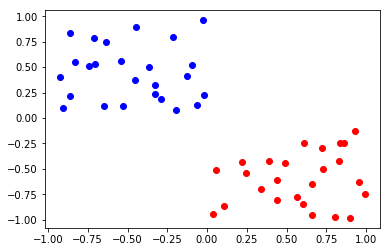

iterations:  100
Error:  0.0
Total Weight Vector Updates:  1


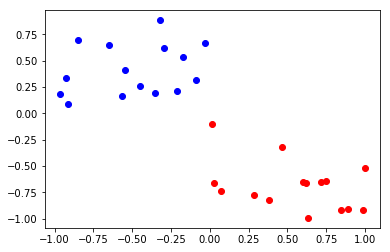


Testing set plot: 
Checking for errors...
Total number of misclassifications:  0
boundary equation: 0.469044761148 x + b


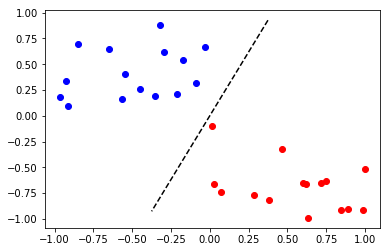

In [40]:
trainset = generateSeparableData(25) # train set generation

# Show the training set.
for x in trainset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')


print()
print("Training set plot: ")

show()
 
# create the perceptron instance.
perceptron = Perceptron()   

# run the training set through the perceptron
perceptron.run(trainset)  

# generate the testing set
testset = generateSeparableData(15)  

# Show the testing set.
for x in testset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

show()

print()
print("Testing set plot: ")
print("Checking for errors...")

err = 0

# Perceptron test
for x in testset:
 r = perceptron.response(x)
# check if the response is not correct, print error
 if r != x[2]: 
  err += 1      
  print("error: ", x[0], ", ", x[1], ", ", x[2])
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

print("Total number of misclassifications: ", err)



# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.weight)

print("boundary equation:", n, "x + b")

ww = perceptron.weight/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

### Summary of results from the first perceptron test.

The training and testing sets were easily linearly separable, so it only took
@ 100 iterations to discover a boundary equation.  A low number ( 1 ) of 
weight vector updates were required. As expected, there were no errors or misclassifications.

### TEST 2 w/ Partially Linearly Separable Data 

The second test uses a weight set of [0.0, 0.0] and a learning rate of .3, and 
training and testing data sets that are only partially separated linearly.


Training set plot: 


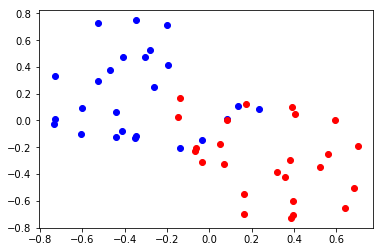

iterations:  10000
Error:  16.0
Total Weight Vector Updates:  1540


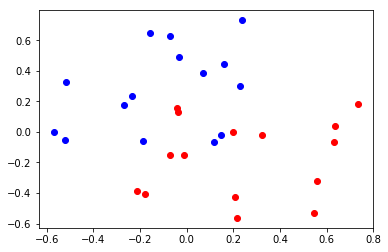


Testing set plot: 
Checking for errors...
error:  0.117990145507 ,  -0.0635790638159 ,  1
error:  -0.189081369813 ,  -0.0570350014674 ,  1
error:  0.148206703101 ,  -0.0227951666789 ,  1
error:  -0.0381014848718 ,  0.128540817164 ,  -1
error:  -0.043115653272 ,  0.158435884968 ,  -1
error:  0.734587475743 ,  0.183570603053 ,  -1
Total number of misclassifications:  6
boundary equation: 0.345538606657 x + b


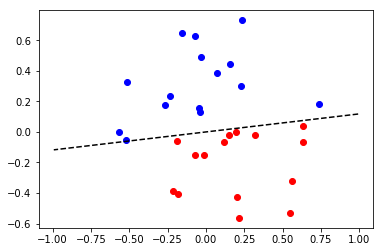

In [41]:
class Perceptron:
    def __init__(self):
        
        # ranged: [-1.0, 1.0]
        self.weight = [0.0, 0.0] 
        # step size constant
        self.learningRate = .3  
        
    def response(self, x):
        
        # dot product between x and w
        y = x[0] * self.weight[0] + x[1] * self.weight[1]  
        if y >= 0:
            return 1
        else:
            return -1
        
    def updateWeights(self, x, iterError):
         
        self.weight[0] += self.learningRate * iterError * x[0]
        self.weight[1] += self.learningRate * iterError * x[1]
        
    def run(self, data):
        """
        train all the vectors in data
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        
        weightUpdateCount = 0
        
        while not learned:
            error = 0.0
            for x in data:
                r = self.response(x)
                # if we have a wrong response
                if x[2] != r:  
                    # desired response - actual response
                    iterError = x[2] - r 
                    self.updateWeights(x, iterError)
                    weightUpdateCount+=1
                    error += abs(iterError)
                iteration += 1
            if error == 0.0 or iteration >= 10000:
                print("iterations: ", iteration)
                print("Error: ", error)
                print("Total Weight Vector Updates: ", weightUpdateCount)
                learned = True 
                # Stop learning

def generateData(n):

    xblue = (rand(n) * 2 - 1) / 2 - 0.25
    yblue = (rand(n) * 2 - 1) / 2 + 0.25
    xred = (rand(n) * 2 - 1) / 2 + 0.25
    yred = (rand(n) * 2 - 1) / 2 - 0.25
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

trainset = generateData(25) # train set generation

# Show the training set.
for x in trainset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')


print()
print("Training set plot: ")

show()
 
# create the perceptron instance.
perceptron = Perceptron()   

# run the training set through the perceptron
perceptron.run(trainset)  

# generate the testing set
testset = generateData(15)  

# Show the testing set.
for x in testset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

show()

print()
print("Testing set plot: ")
print("Checking for errors...")

err = 0

# Perceptron test
for x in testset:
 r = perceptron.response(x)
# check if the response is not correct, print error
 if r != x[2]: 
  err += 1      
  print("error: ", x[0], ", ", x[1], ", ", x[2])
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

print("Total number of misclassifications: ", err)



# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.weight)

print("boundary equation:", n, "x + b")

ww = perceptron.weight/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

### Summary of results from the second perceptron test.

The training and testing sets were only partially linearly separable, so it took @ 10000 iterations to discover a boundary equation. Also, a higher number ( 1540 ) of weight vector updates were required. The algorithm had a
fair number ( 6 ) of misclassifications.  

### TEST 3 w/ Non Linearly Separable Data 

The second test uses a weight set of [0.0, 0.0] and a learning rate of .3, and 
training and testing data sets that are not easily separated linearly.


Training set plot: 


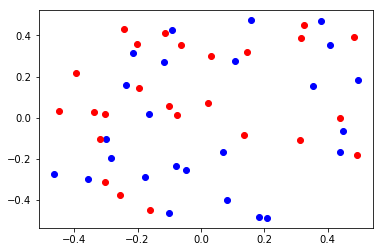

iterations:  10000
Error:  54.0
Total Weight Vector Updates:  5185


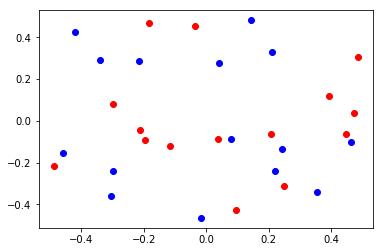


Testing set plot: 
Checking for errors...
error:  -0.182503974196 ,  0.469188461942 ,  -1
error:  -0.0355970564299 ,  0.456344362116 ,  -1
error:  -0.298215302749 ,  -0.2404232938 ,  1
error:  -0.303271684133 ,  -0.358512748428 ,  1
error:  0.445070082488 ,  -0.0629303090394 ,  -1
error:  -0.0181851927403 ,  -0.465823680167 ,  1
error:  0.219759781777 ,  -0.240069617689 ,  1
error:  0.206367588367 ,  -0.063047449334 ,  -1
error:  0.353988198534 ,  -0.340825484865 ,  1
error:  0.472136329316 ,  0.0351478104964 ,  -1
error:  0.0785951994782 ,  -0.0878635996736 ,  1
error:  0.485276052983 ,  0.307695082687 ,  -1
error:  -0.457782430263 ,  -0.15332585921 ,  1
error:  0.391602646957 ,  0.118359312652 ,  -1
Total number of misclassifications:  14
boundary equation: 0.0585798045954 x + b


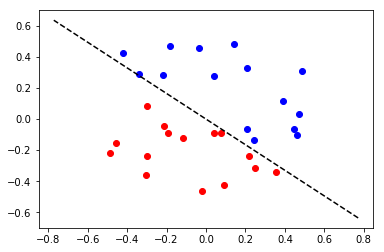

In [42]:
class Perceptron:
    def __init__(self):
        
        # ranged: [-1.0, 1.0]
        self.weight = [0.0, 0.0] 
        # step size constant
        self.learningRate = .3  
        
    def response(self, x):
        
        # dot product between x and w
        y = x[0] * self.weight[0] + x[1] * self.weight[1]  
        if y >= 0:
            return 1
        else:
            return -1
        
    def updateWeights(self, x, iterError):
         
        self.weight[0] += self.learningRate * iterError * x[0]
        self.weight[1] += self.learningRate * iterError * x[1]
        
    def run(self, data):
        """
        train all the vectors in data
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        
        weightUpdateCount = 0
        
        while not learned:
            error = 0.0
            for x in data:
                r = self.response(x)
                # if we have a wrong response
                if x[2] != r:  
                    # desired response - actual response
                    iterError = x[2] - r 
                    self.updateWeights(x, iterError)
                    weightUpdateCount+=1
                    error += abs(iterError)
                iteration += 1
            if error == 0.0 or iteration >= 10000:
                print("iterations: ", iteration)
                print("Error: ", error)
                print("Total Weight Vector Updates: ", weightUpdateCount)
                learned = True 
                # Stop learning

def generateData(n):

    xblue = (rand(n) * 2 - 1) / 2 - 0.25
    yblue = (rand(n) * 2 - 1) / 2 + 0.25
    xred = (rand(n) * 2 - 1) / 2 + 0.25
    yred = (rand(n) * 2 - 1) / 2 - 0.25
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

trainset = generateNonLinearData(25) # train set generation

# Show the training set.
for x in trainset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')


print()
print("Training set plot: ")

show()
 
# create the perceptron instance.
perceptron = Perceptron()   

# run the training set through the perceptron
perceptron.run(trainset)  

# generate the testing set
testset = generateNonLinearData(15)  

# Show the testing set.
for x in testset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

show()

print()
print("Testing set plot: ")
print("Checking for errors...")

err = 0

# Perceptron test
for x in testset:
 r = perceptron.response(x)
# check if the response is not correct, print error
 if r != x[2]: 
  err += 1      
  print("error: ", x[0], ", ", x[1], ", ", x[2])
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

print("Total number of misclassifications: ", err)



# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.weight)

print("boundary equation:", n, "x + b")

ww = perceptron.weight/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

### Summary of the results from the third perceptron test.

The training and testing sets were not designed to be linearly separable, so it took @ 10000 iterations to discover a workable boundary equation. Also, a higher number ( 5185 ) of weight vector updates were required. This is further highlighted by the fact the training algorithm had a very high amound of errors, at 54.  The algorithm had a very high number ( 14 ) of misclassifications. 

# PART TWO
### Will the initial choice of weights affect the perceptron learning algorithm?

In this test of the PLA, we use a partially linearly separable data set, as used in Test 2.
Instead of weights set at 0.0, 0.0, we choose 4.0, 4.0 and compare the results.  We hold all other 
elements of the test the same.  The learning rate is .3 and the training and testing sets are 
generated using the same formula.


Training set plot: 


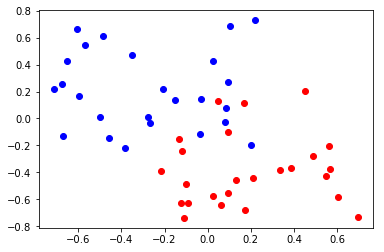

iterations:  10000
Error:  16.0
Total Weight Vector Updates:  1322


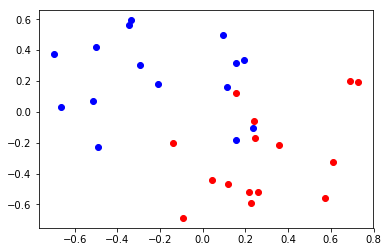


Testing set plot: 
Checking for errors...
error:  0.237159043171 ,  -0.104162986423 ,  1
error:  0.156072374768 ,  0.123952884149 ,  -1
error:  0.157462678408 ,  -0.182459384771 ,  1
error:  -0.489174783055 ,  -0.22585098176 ,  1
Total number of misclassifications:  4
boundary equation: 0.492217161517 x + b


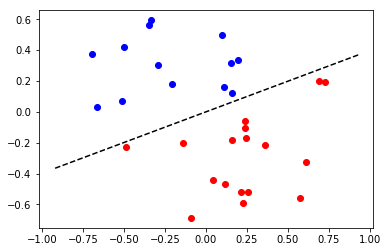

In [43]:
class Perceptron:
    def __init__(self):
        
        # ranged: [-1.0, 1.0]
        self.weight = [4.0, 4.0] 
        # step size constant
        self.learningRate = .3  
        
    def response(self, x):
        
        # dot product between x and w
        y = x[0] * self.weight[0] + x[1] * self.weight[1]  
        if y >= 0:
            return 1
        else:
            return -1
        
    def updateWeights(self, x, iterError):
         
        self.weight[0] += self.learningRate * iterError * x[0]
        self.weight[1] += self.learningRate * iterError * x[1]
        
    def run(self, data):
        """
        train all the vectors in data
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        
        weightUpdateCount = 0
        
        while not learned:
            error = 0.0
            for x in data:
                r = self.response(x)
                # if we have a wrong response
                if x[2] != r:  
                    # desired response - actual response
                    iterError = x[2] - r 
                    self.updateWeights(x, iterError)
                    weightUpdateCount+=1
                    error += abs(iterError)
                iteration += 1
            if error == 0.0 or iteration >= 10000:
                print("iterations: ", iteration)
                print("Error: ", error)
                print("Total Weight Vector Updates: ", weightUpdateCount)
                learned = True 
                # Stop learning

def generateData(n):

    xblue = (rand(n) * 2 - 1) / 2 - 0.25
    yblue = (rand(n) * 2 - 1) / 2 + 0.25
    xred = (rand(n) * 2 - 1) / 2 + 0.25
    yred = (rand(n) * 2 - 1) / 2 - 0.25
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

trainset = generateData(25) # train set generation

# Show the training set.
for x in trainset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')


print()
print("Training set plot: ")

show()
 
# create the perceptron instance.
perceptron = Perceptron()   

# run the training set through the perceptron
perceptron.run(trainset)  

# generate the testing set
testset = generateData(15)  

# Show the testing set.
for x in testset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

show()

print()
print("Testing set plot: ")
print("Checking for errors...")

err = 0

# Perceptron test
for x in testset:
 r = perceptron.response(x)
# check if the response is not correct, print error
 if r != x[2]: 
  err += 1      
  print("error: ", x[0], ", ", x[1], ", ", x[2])
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

print("Total number of misclassifications: ", err)



# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.weight)

print("boundary equation:", n, "x + b")

ww = perceptron.weight/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

### Summary of the results from Part Two.

The training and testing sets were designed to be partially linearly separable, so it took @ 10000 iterations to discover a workable boundary equation just like the similar test from part 1.  Only a modest amount of weight vector updates were required ( 1322 ).  Interestingly, for this test, there isn't much difference between the end results in part 1 and this test.  We can conclude, for these training and testing data sets, that a different choice of weights had little to no affect on the end results.

# PART THREE
### Will the learning rate change the results of perceptron learning algorithm on this data set?

In this test of the PLA, again we will use a partially linearly separable data set, as used in Test 2.
Instead of a learning rate set at 0.3, we choose 4.0 and compare the results.  We hold all other 
elements of the test the same.  The weights are initially set at 0.0 and 0.0 and the training and testing sets are 
generated using the same formula.


Training set plot: 


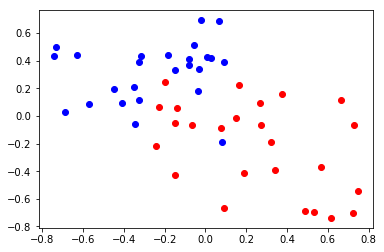

iterations:  10000
Error:  22.0
Total Weight Vector Updates:  1964


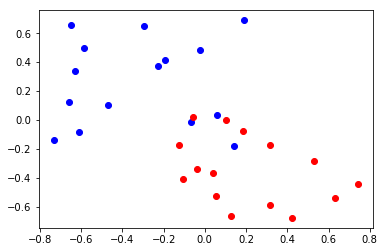


Testing set plot: 
Checking for errors...
error:  -0.297431519501 ,  0.65288791073 ,  1
error:  -0.104096429335 ,  -0.406407953736 ,  -1
error:  -0.195221314502 ,  0.414476512869 ,  1
error:  0.315953249171 ,  -0.588327438046 ,  -1
error:  0.139418886063 ,  -0.177333869175 ,  1
error:  -0.125475786642 ,  -0.16936440233 ,  -1
error:  -0.0400588384557 ,  -0.340266804886 ,  -1
error:  0.0608084194678 ,  0.0321219520528 ,  1
error:  0.0544529971396 ,  -0.522531003823 ,  -1
error:  0.191590875909 ,  0.689363322111 ,  1
error:  0.039975019667 ,  -0.366977765288 ,  -1
error:  0.127203978513 ,  -0.662927442147 ,  -1
error:  -0.228945196695 ,  0.370805120906 ,  1
error:  0.42093152242 ,  -0.675994252889 ,  -1
error:  -0.0236575254851 ,  0.486123419939 ,  1
error:  -0.0568744731519 ,  0.0190271183975 ,  -1
Total number of misclassifications:  16
boundary equation: 2.3095265519 x + b


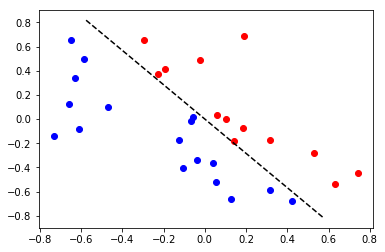

In [45]:
class Perceptron:
    def __init__(self):
        
        # ranged: [-1.0, 1.0]
        self.weight = [0.0, 0.0] 
        # step size constant
        self.learningRate = 4  
        
    def response(self, x):
        
        # dot product between x and w
        y = x[0] * self.weight[0] + x[1] * self.weight[1]  
        if y >= 0:
            return 1
        else:
            return -1
        
    def updateWeights(self, x, iterError):
         
        self.weight[0] += self.learningRate * iterError * x[0]
        self.weight[1] += self.learningRate * iterError * x[1]
        
    def run(self, data):
        """
        train all the vectors in data
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        
        weightUpdateCount = 0
        
        while not learned:
            error = 0.0
            for x in data:
                r = self.response(x)
                # if we have a wrong response
                if x[2] != r:  
                    # desired response - actual response
                    iterError = x[2] - r 
                    self.updateWeights(x, iterError)
                    weightUpdateCount+=1
                    error += abs(iterError)
                iteration += 1
            if error == 0.0 or iteration >= 10000:
                print("iterations: ", iteration)
                print("Error: ", error)
                print("Total Weight Vector Updates: ", weightUpdateCount)
                learned = True 
                # Stop learning

def generateData(n):

    xblue = (rand(n) * 2 - 1) / 2 - 0.25
    yblue = (rand(n) * 2 - 1) / 2 + 0.25
    xred = (rand(n) * 2 - 1) / 2 + 0.25
    yred = (rand(n) * 2 - 1) / 2 - 0.25
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

trainset = generateData(25) # train set generation

# Show the training set.
for x in trainset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')


print()
print("Training set plot: ")

show()
 
# create the perceptron instance.
perceptron = Perceptron()   

# run the training set through the perceptron
perceptron.run(trainset)  

# generate the testing set
testset = generateData(15)  

# Show the testing set.
for x in testset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

show()

print()
print("Testing set plot: ")
print("Checking for errors...")

err = 0

# Perceptron test
for x in testset:
 r = perceptron.response(x)
# check if the response is not correct, print error
 if r != x[2]: 
  err += 1      
  print("error: ", x[0], ", ", x[1], ", ", x[2])
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

print("Total number of misclassifications: ", err)



# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.weight)

print("boundary equation:", n, "x + b")

ww = perceptron.weight/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

### Summary of the results from Part Three.

The training and testing sets were designed to be partially linearly separable, so it took @ 10000 iterations to discover a workable boundary equation just like the similar test from part 2.  There are a couple of substantial differences between the end results in part 1 and this test.  For example, the initial number of errors ( 22 ) is higher on the training set when using a high learning rate.  Also, the algorithm require a greater number ( 1964 ) of total weight vector updates.  The final number of misclassifications totaled 16 vs 6 in the original test 2.  We can conclude, for this training set and testing set, that a different choice of learning rate can substantially affect the end results.

# PART FOUR
### Will altering the order the data is processed change the results of perceptron learning algorithm on this data set?

For the final test, we will shuffle the training data set and compare the results to determine if loading the data in a different fashion could alter the results of the PLA.  


Training set plot: 


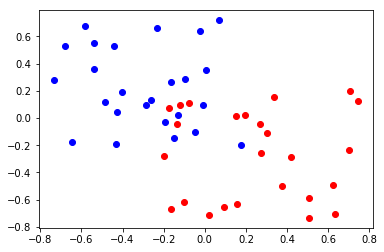

iterations:  10000
Error:  16.0
Total Weight Vector Updates:  1837


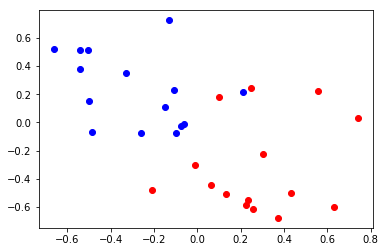


Testing set plot: 
Checking for errors...
error:  0.210616589037 ,  0.214101453949 ,  1
error:  0.100491678526 ,  0.184139259366 ,  -1
Total number of misclassifications:  2
boundary equation: 0.242490842786 x + b


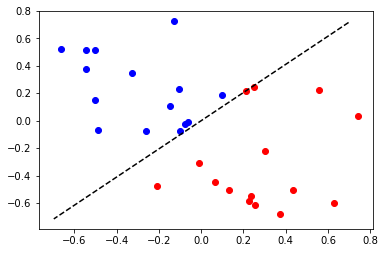

In [44]:
from random import shuffle

class Perceptron:
    def __init__(self):
        
        # ranged: [-1.0, 1.0]
        self.weight = [0.0, 0.0] 
        # step size constant
        self.learningRate = .3  
        
    def response(self, x):
        
        # dot product between x and w
        y = x[0] * self.weight[0] + x[1] * self.weight[1]  
        if y >= 0:
            return 1
        else:
            return -1
        
    def updateWeights(self, x, iterError):
         
        self.weight[0] += self.learningRate * iterError * x[0]
        self.weight[1] += self.learningRate * iterError * x[1]
        
    def run(self, data):
        """
        train all the vectors in data
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        
        weightUpdateCount = 0
        
        while not learned:
            error = 0.0
            for x in data:
                r = self.response(x)
                # if we have a wrong response
                if x[2] != r:  
                    # desired response - actual response
                    iterError = x[2] - r 
                    self.updateWeights(x, iterError)
                    weightUpdateCount+=1
                    error += abs(iterError)
                iteration += 1
            if error == 0.0 or iteration >= 10000:
                print("iterations: ", iteration)
                print("Error: ", error)
                print("Total Weight Vector Updates: ", weightUpdateCount)
                learned = True 
                # Stop learning

def generateData(n):

    xblue = (rand(n) * 2 - 1) / 2 - 0.25
    yblue = (rand(n) * 2 - 1) / 2 + 0.25
    xred = (rand(n) * 2 - 1) / 2 + 0.25
    yred = (rand(n) * 2 - 1) / 2 - 0.25
    
    inputs = []
    for i in range(len(xblue)):
        inputs.append([xblue[i], yblue[i], 1])
        inputs.append([xred[i], yred[i], -1])
    return inputs

trainset = generateData(25) # train set generation

# SHUFFLE THE DATASET
shuffle(trainset)

# Show the training set.
for x in trainset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')


print()
print("Training set plot: ")

show()
 
# create the perceptron instance.
perceptron = Perceptron()   

# run the training set through the perceptron
perceptron.run(trainset)  

# generate the testing set
testset = generateData(15)  

# Show the testing set.
for x in testset:
 r = x[2]
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

show()

print()
print("Testing set plot: ")
print("Checking for errors...")

err = 0

# Perceptron test
for x in testset:
 r = perceptron.response(x)
# check if the response is not correct, print error
 if r != x[2]: 
  err += 1      
  print("error: ", x[0], ", ", x[1], ", ", x[2])
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

print("Total number of misclassifications: ", err)



# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.weight)

print("boundary equation:", n, "x + b")

ww = perceptron.weight/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

### Summary of the results from Part 4.

The number of errors and the number of weight vector updates were within range of the results of test 2.  The total number of misclassifications ( 2 ) does not greatly differ from the number ( 4 ) in the previous test.  We can conclude that however the data set is iterated, the end results of the PLA will be approximately the same.

# FINAL REPORT.

We've tested the PLA with several different changes to the variables.  Per the project requirements, we've highlighted whether or not linearly separable data points affect the PLA's performance (it does).  We've changed the the weights and learning rates and found, especially with the learning rate, changes to performance and efficiency can occur.  

We've discovered that no matter what, the PLA will come up with a workable decision boundary.  This is based on the amount of iterations we allow the algorithm to perform.

We've also discovered that order in which we considering the training data has little to no effect on the end result.